In [1]:
%cd drive/MyDrive/Colab\ Notebooks/HouseholdDebt

/content/drive/MyDrive/Colab Notebooks/HouseholdDebt


# 한글세팅

In [2]:
!sudo apt-get update -qq
!sudo apt-get install fonts-nanum* -qq

In [3]:
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [4]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

NanumBarunGothic


In [5]:
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

In [6]:
import seaborn as sns

In [7]:
sns.set(font=font_name, 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [8]:
import pandas as pd

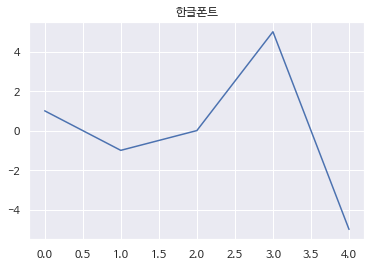

In [9]:
pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")
None

# 20대 소득 상위 신용관리대상등록자수 VECM


In [10]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 10.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [11]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import *

## Data load

In [12]:
df = pd.read_csv('data/all_macro_data.csv', index_col=0)

In [13]:
df_ur = pd.read_csv('data/실업률.csv')

In [14]:
df['unemployment_rate'] = list(df_ur[(df_ur['성별']=='계') & (df_ur['연령계층별']=='20 - 29세')]['데이터'])

In [15]:
df_default = pd.read_csv('data/default.csv')
df['default_20s_high'] = df_default[(df_default['연령대'] == '20대') & (df_default['소득추정등급'].isin([12, 13, 14, 15]))].groupby('기준분기').sum()['신용관리대상등록총금액<미적용, 등록자수, 명>']

In [16]:
from sklearn.preprocessing import StandardScaler
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)

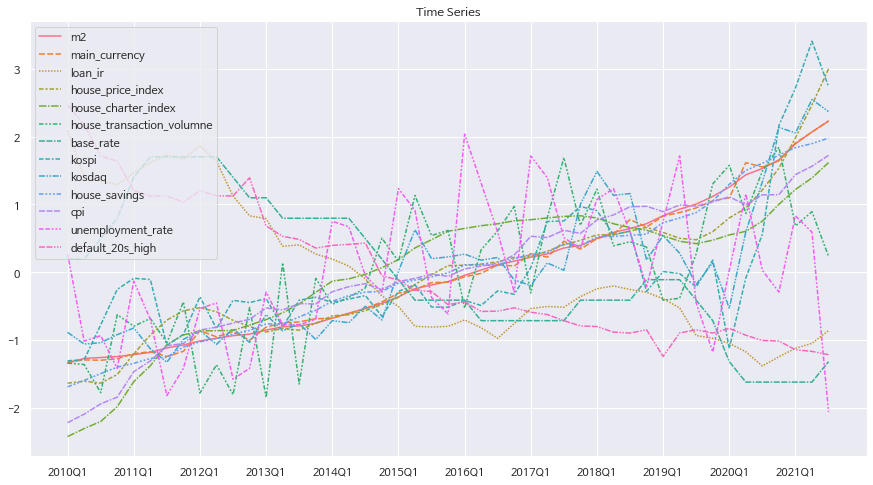

In [17]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_scaled)
ax.set_title('Time Series')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [18]:
df = df[['house_savings', 'loan_ir', 'unemployment_rate', 'cpi', 'kospi', 'house_price_index', 'default_20s_high']]

In [19]:
df

,house_savings,loan_ir,unemployment_rate,cpi,kospi,house_price_index,default_20s_high
2010Q1,3842540.0,5.91,9.0,85.523,1692.85,78.746871,3792
2010Q2,3940755.0,5.26,7.4,86.070,1698.29,78.902356,3610
2010Q3,4045679.0,5.20,7.5,86.733,1872.81,78.749925,3318
2010Q4,4144716.0,5.15,6.9,87.165,2051.00,79.410579,3267
2011Q1,4203173.0,5.32,8.5,88.806,2106.70,80.992792,2994
2011Q2,4277493.0,5.46,7.8,89.497,2100.69,82.421818,2941
2011Q3,4295968.0,5.57,6.4,90.476,1769.65,83.565929,2942
2011Q4,4454363.0,5.51,6.9,90.620,1825.74,84.283540,2886
2012Q1,4533489.0,5.70,8.0,91.481,2014.04,84.513625,2992
2012Q2,4581504.0,5.48,8.1,91.671,1854.01,84.204223,2944


In [20]:
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)

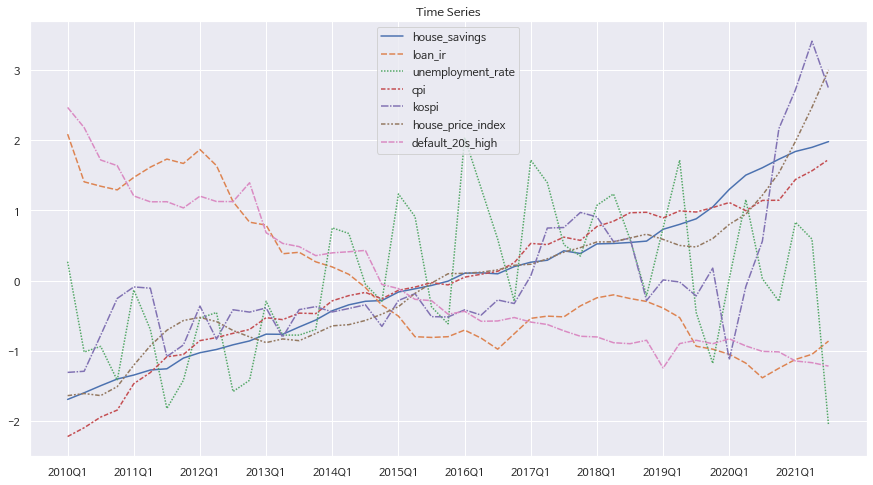

In [21]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_scaled)
ax.set_title('Time Series')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

## Granger's causality

In [22]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', maxlag=12, verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [23]:
grangers_causation_matrix(df, variables = df.columns)

,house_savings_x,loan_ir_x,unemployment_rate_x,cpi_x,kospi_x,house_price_index_x,default_20s_high_x
house_savings_y,1.0,0.0000,0.0000,0.0001,0.0000,0.0,0.0000
loan_ir_y,0.0,1.0000,0.0000,0.0000,0.0000,0.0,0.0000
unemployment_rate_y,0.0,0.0000,1.0000,0.0003,0.0000,0.0,0.0019
cpi_y,0.0,0.0001,0.0000,1.0000,0.0000,0.0,0.0364
kospi_y,0.0,0.0043,0.0783,0.0000,1.0000,0.0,0.0000
house_price_index_y,0.0,0.0000,0.0000,0.0001,0.0000,1.0,0.0000
default_20s_high_y,0.0,0.0000,0.0000,0.0001,0.0011,0.0,1.0000


## Unit root test

In [24]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [25]:
for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "house_savings" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.2441
 No. Lags Chosen       = 0
 Critical value 1%     = -3.581
 Critical value 5%     = -2.927
 Critical value 10%    = -2.602
 => P-Value = 0.9963. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "loan_ir" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.0996
 No. Lags Chosen       = 1
 Critical value 1%     = -3.585
 Critical value 5%     = -2.928
 Critical value 10%    = -2.602
 => P-Value = 0.7152. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "unemployment_rate" 
    -----------------------------------------------
 Null Hypo

In [26]:
for name, column in df.diff().dropna().iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "house_savings" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.7479
 No. Lags Chosen       = 0
 Critical value 1%     = -3.585
 Critical value 5%     = -2.928
 Critical value 10%    = -2.602
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "loan_ir" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.4076
 No. Lags Chosen       = 0
 Critical value 1%     = -3.585
 Critical value 5%     = -2.928
 Critical value 10%    = -2.602
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "unemployment_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Sign

## Cointegration rank

In [27]:
def cointegration_test(df, det_order=-1, k_ar_diff=5, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df, det_order=det_order,k_ar_diff=k_ar_diff)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [28]:
cointegration_test(df, 1, 3)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
house_savings ::  288.17    > 139.278   =>   True
loan_ir ::  196.44    > 107.3429  =>   True
unemployment_rate ::  134.54    > 79.3422   =>   True
cpi    ::  87.04     > 55.2459   =>   True
kospi  ::  47.65     > 35.0116   =>   True
house_price_index ::  20.14     > 18.3985   =>   True
default_20s_high ::  5.28      > 3.8415    =>   True


In [29]:
rank_test = select_coint_rank(df, 1, 3, method="trace",
                              signif=0.05)
rank_test.rank

7

In [30]:
rank_test.summary()

r_0,r_1,test statistic,critical value
0,7,288.2,139.3
1,7,196.4,107.3
2,7,134.5,79.34
3,7,87.04,55.25
4,7,47.65,35.01
5,7,20.14,18.40
6,7,5.280,3.841


## Lag order selection

In [31]:
lag_order = select_order(data=df, maxlags=10, deterministic="ci", seasons=4)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

,AIC,BIC,FPE,HQIC
0,31.27,34.97,4.592e+13,32.56
1,30.06,35.91,2.608e+13,32.10
2,27.85,35.86,1.781e+13,30.64
3,-25.81,-15.65,5.637e-08,-22.26
4,-276.6,-264.3,-1.199e-118*,-272.3
5,-298.0,-283.5*,-6.100e-132,-293.0*
6,-298.6*,-282.0,-1.183e-134,-292.8
7,-279.5,-260.7,-2.634e-128,-273.0
8,-286.6,-265.7,-4.131e-133,-279.3
9,-291.9,-268.8,-5.560e-137,-283.8


In [32]:
lag_order = select_order(data=df, maxlags=3, deterministic='li', seasons=4)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,31.25,34.69,4.147e+13,32.52
1,29.64,35.09,1.176e+13,31.65
2,29.22,36.67,1.866e+13,31.97
3,24.39*,33.85*,1.235e+12*,27.88*


In [33]:
lag_order = select_order(data=df, maxlags=10, deterministic='li', seasons=0)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

,AIC,BIC,FPE,HQIC
0,31.02,33.79,3.202e+13,31.99
1,30.21,35.14,2.099e+13,31.93
2,28.48,35.56,1.211e+13,30.95
3,-11.85,-2.610,0.001196,-8.623
4,-266.5,-255.1,-1.152e-109*,-262.5
5,-297.6,-284.0,-2.138e-130,-292.9
6,-302.0*,-286.3*,-3.717e-135,-296.5*
7,-281.7,-263.8,-1.992e-128,-275.4
8,-288.4,-268.4,-3.576e-133,-281.4
9,-286.2,-264.0,-8.005e-134,-278.4


In [34]:
lag_order = select_order(data=df, maxlags=3, deterministic='lo', seasons=4)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,31.25,34.69,4.147e+13,32.52
1,29.64,35.09,1.176e+13,31.65
2,29.22,36.67,1.866e+13,31.97
3,24.39*,33.85*,1.235e+12*,27.88*


In [35]:
lag_order = select_order(data=df, maxlags=10, deterministic='lo', seasons=0)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

,AIC,BIC,FPE,HQIC
0,31.02,33.79,3.202e+13,31.99
1,30.21,35.14,2.099e+13,31.93
2,28.48,35.56,1.211e+13,30.95
3,-11.85,-2.610,0.001196,-8.623
4,-266.5,-255.1,-1.152e-109*,-262.5
5,-297.6,-284.0,-2.138e-130,-292.9
6,-302.0*,-286.3*,-3.717e-135,-296.5*
7,-281.7,-263.8,-1.992e-128,-275.4
8,-288.4,-268.4,-3.576e-133,-281.4
9,-286.2,-264.0,-8.005e-134,-278.4


## Parameter estimation

In [36]:
model = VECM(df,
             k_ar_diff=3,
             coint_rank=7,
             deterministic='lo',
             seasons=4)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [37]:
vecm_res = model.fit()

In [38]:
vecm_res.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
season1,1170.2599,3.66e+04,0.032,0.974,-7.05e+04,7.28e+04
season2,3.587e+04,3.94e+04,0.911,0.362,-4.13e+04,1.13e+05
season3,4.885e+04,2.84e+04,1.721,0.085,-6799.419,1.05e+05
lin_trend,6.485e+04,2.18e+04,2.975,0.003,2.21e+04,1.08e+05
L1.house_savings,-0.2002,0.184,-1.089,0.276,-0.560,0.160
L1.loan_ir,4.85e+04,7.89e+04,0.615,0.539,-1.06e+05,2.03e+05
L1.unemployment_rate,5.861e+04,1.83e+04,3.210,0.001,2.28e+04,9.44e+04
L1.cpi,-6.09e+04,2.72e+04,-2.236,0.025,-1.14e+05,-7525.385
L1.kospi,264.0485,75.754,3.486,0.000,115.574,412.523
L1.house_price_index,8.222e+04,2.8e+04,2.932,0.003,2.73e+04,1.37e+05


## Forecasts

In [39]:
vecm_res.predict(steps=5)

array([[7.68911993e+06, 3.87448686e+00, 7.43944642e+00, 1.03185411e+02,
        3.02249857e+03, 1.04471013e+02, 1.32965291e+03],
       [7.64870984e+06, 4.53207282e+00, 9.28583012e+00, 1.04591559e+02,
        2.99260082e+03, 1.05658477e+02, 1.24156772e+03],
       [7.53206087e+06, 5.03355581e+00, 9.86170076e+00, 1.05775140e+02,
        3.41170101e+03, 1.05969126e+02, 1.34789860e+03],
       [7.43134449e+06, 5.52707828e+00, 7.55916201e+00, 1.07346982e+02,
        3.67645851e+03, 1.05912227e+02, 1.43348766e+03],
       [7.32481892e+06, 5.90016913e+00, 6.82122295e+00, 1.08232771e+02,
        3.68530816e+03, 1.05648389e+02, 1.55202372e+03]])

In [40]:
vecm_res.predict(steps=5, alpha=0.05)
for text, vaĺues in zip(("forecast", "lower", "upper"), vecm_res.predict(steps=5, alpha=0.05)):
    print(text+":", vaĺues, sep="\n")

forecast:
[[7.68911993e+06 3.87448686e+00 7.43944642e+00 1.03185411e+02
  3.02249857e+03 1.04471013e+02 1.32965291e+03]
 [7.64870984e+06 4.53207282e+00 9.28583012e+00 1.04591559e+02
  2.99260082e+03 1.05658477e+02 1.24156772e+03]
 [7.53206087e+06 5.03355581e+00 9.86170076e+00 1.05775140e+02
  3.41170101e+03 1.05969126e+02 1.34789860e+03]
 [7.43134449e+06 5.52707828e+00 7.55916201e+00 1.07346982e+02
  3.67645851e+03 1.05912227e+02 1.43348766e+03]
 [7.32481892e+06 5.90016913e+00 6.82122295e+00 1.08232771e+02
  3.68530816e+03 1.05648389e+02 1.55202372e+03]]
lower:
[[7.64220099e+06 3.79261910e+00 6.90455289e+00 1.02821124e+02
  2.86034148e+03 1.04185355e+02 1.24964306e+03]
 [7.58015519e+06 4.37628154e+00 8.66139061e+00 1.04069173e+02
  2.79119240e+03 1.05106130e+02 1.12511354e+03]
 [7.44344457e+06 4.80761631e+00 9.20287198e+00 1.05166252e+02
  3.19044533e+03 1.05206602e+02 1.21714274e+03]
 [7.32200626e+06 5.26617621e+00 6.88130877e+00 1.06672794e+02
  3.44138941e+03 1.04934719e+02 1.294185

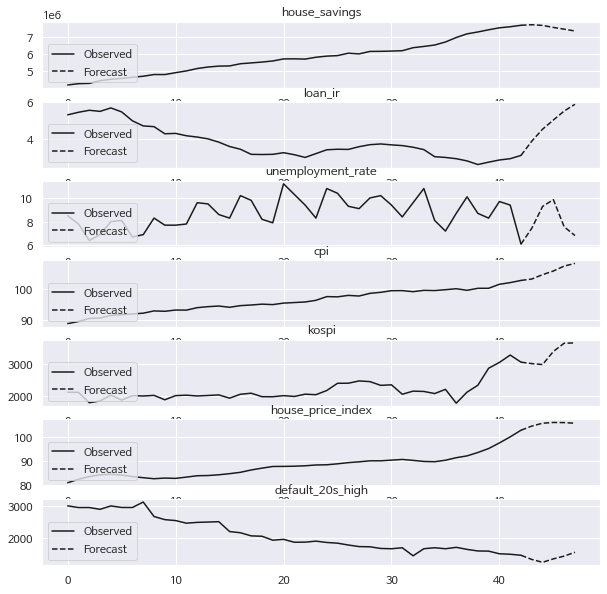

In [41]:
vecm_res.plot_forecast(steps=5, plot_conf_int=False)

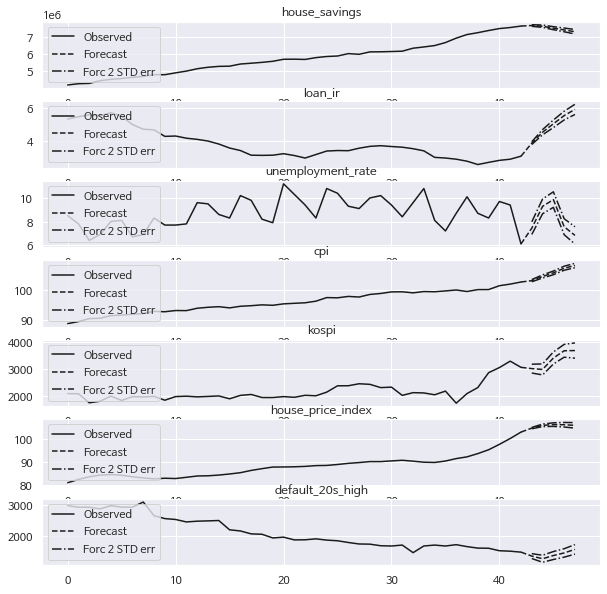

In [42]:
vecm_res.plot_forecast(steps=5, plot_conf_int=True)

## Structural analysis

### Granger causality

In [43]:
granger_results = vecm_res.test_granger_causality(caused="default_20s_high", causing='cpi', signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
7.979,2.840,0.000,"(4, 21)"


### Instantaneous causality

In [44]:
inst_caus_base_rate = vecm_res.test_inst_causality(causing="cpi")
inst_caus_base_rate.summary()

Test statistic,Critical value,p-value,df
19.61,12.59,0.003,6


### Impulse response analysis

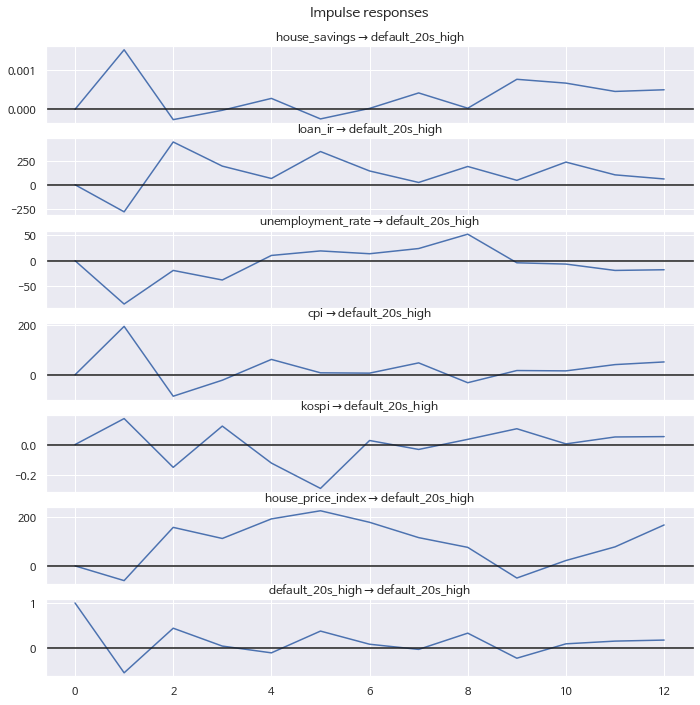

In [45]:
num_periods = 12
ir = vecm_res.irf(periods=num_periods)
#ir.plot(orth=False, plot_stderr=False, figsize=(15, 15))
ir.plot(orth=False, plot_stderr=False, response='default_20s_high')
None

## Diagnostics

### Testing for nonormality

In [46]:
norm_test = vecm_res.test_normality()
norm_test.summary()

Test statistic,Critical value,p-value,df
6.562,23.68,0.950,14


### Checking for residual autocorrelation

In [47]:
white_test = vecm_res.test_whiteness(nlags=12, adjusted=True)
white_test.summary()

Test statistic,Critical value,p-value,df
813.5,439.2,0.000,392


# 20대 소득 중위 신용관리대상등록자수 VECM


In [ ]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 5.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [48]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import *

## Data load

In [49]:
df = pd.read_csv('data/all_macro_data.csv', index_col=0)

In [50]:
df_ur = pd.read_csv('data/실업률.csv')

In [51]:
df['unemployment_rate'] = list(df_ur[(df_ur['성별']=='계') & (df_ur['연령계층별']=='20 - 29세')]['데이터'])

In [52]:
df_default = pd.read_csv('data/default.csv')
df['default_20s_mid'] = df_default[(df_default['연령대'] == '20대') & (df_default['소득추정등급'].isin([8, 9, 10, 11]))].groupby('기준분기').sum()['신용관리대상등록총금액<미적용, 등록자수, 명>']

In [53]:
from sklearn.preprocessing import StandardScaler
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)

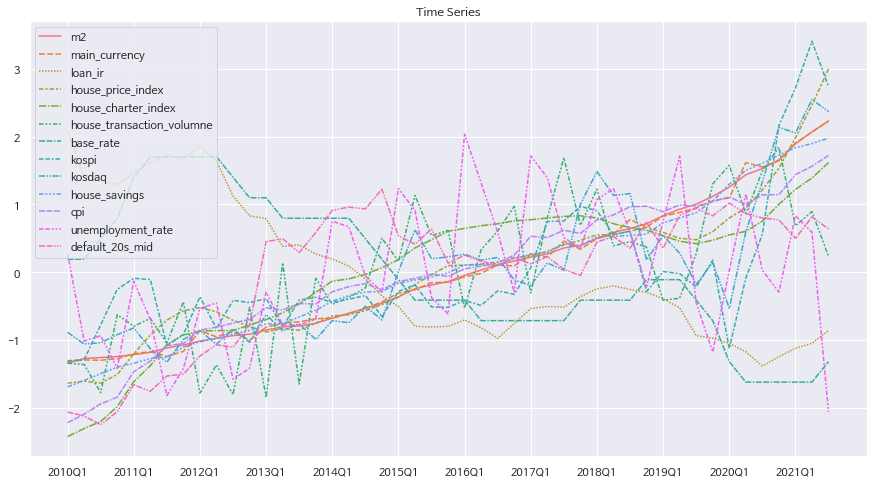

In [54]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_scaled)
ax.set_title('Time Series')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [55]:
df = df[['house_savings', 'loan_ir', 'unemployment_rate', 'cpi', 'kospi', 'house_price_index', 'default_20s_mid']]

In [56]:
df

,house_savings,loan_ir,unemployment_rate,cpi,kospi,house_price_index,default_20s_mid
2010Q1,3842540.0,5.91,9.0,85.523,1692.85,78.746871,417
2010Q2,3940755.0,5.26,7.4,86.070,1698.29,78.902356,406
2010Q3,4045679.0,5.20,7.5,86.733,1872.81,78.749925,382
2010Q4,4144716.0,5.15,6.9,87.165,2051.00,79.410579,418
2011Q1,4203173.0,5.32,8.5,88.806,2106.70,80.992792,492
2011Q2,4277493.0,5.46,7.8,89.497,2100.69,82.421818,474
2011Q3,4295968.0,5.57,6.4,90.476,1769.65,83.565929,516
2011Q4,4454363.0,5.51,6.9,90.620,1825.74,84.283540,521
2012Q1,4533489.0,5.70,8.0,91.481,2014.04,84.513625,571
2012Q2,4581504.0,5.48,8.1,91.671,1854.01,84.204223,602


In [57]:
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)

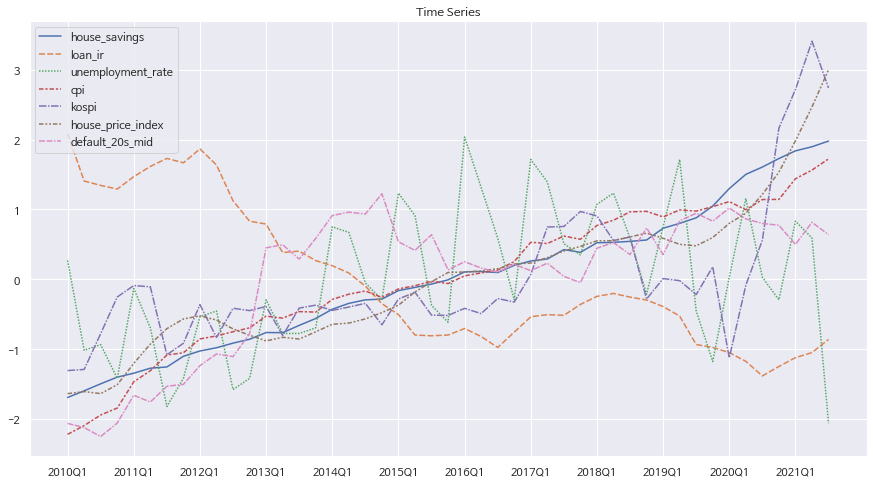

In [58]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_scaled)
ax.set_title('Time Series')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

## Granger's causality

In [59]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', maxlag=12, verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [60]:
grangers_causation_matrix(df, variables = df.columns)

,house_savings_x,loan_ir_x,unemployment_rate_x,cpi_x,kospi_x,house_price_index_x,default_20s_mid_x
house_savings_y,1.0,0.0000,0.0000,0.0001,0.0,0.0,0.0000
loan_ir_y,0.0,1.0000,0.0000,0.0000,0.0,0.0,0.0001
unemployment_rate_y,0.0,0.0000,1.0000,0.0003,0.0,0.0,0.0000
cpi_y,0.0,0.0001,0.0000,1.0000,0.0,0.0,0.0000
kospi_y,0.0,0.0043,0.0783,0.0000,1.0,0.0,0.0000
house_price_index_y,0.0,0.0000,0.0000,0.0001,0.0,1.0,0.0082
default_20s_mid_y,0.0,0.0000,0.0000,0.0001,0.0,0.0,1.0000


## Unit root test

In [61]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [62]:
for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "house_savings" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.2441
 No. Lags Chosen       = 0
 Critical value 1%     = -3.581
 Critical value 5%     = -2.927
 Critical value 10%    = -2.602
 => P-Value = 0.9963. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "loan_ir" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.0996
 No. Lags Chosen       = 1
 Critical value 1%     = -3.585
 Critical value 5%     = -2.928
 Critical value 10%    = -2.602
 => P-Value = 0.7152. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "unemployment_rate" 
    -----------------------------------------------
 Null Hypo

In [63]:
for name, column in df.diff().dropna().iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "house_savings" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.7479
 No. Lags Chosen       = 0
 Critical value 1%     = -3.585
 Critical value 5%     = -2.928
 Critical value 10%    = -2.602
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "loan_ir" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.4076
 No. Lags Chosen       = 0
 Critical value 1%     = -3.585
 Critical value 5%     = -2.928
 Critical value 10%    = -2.602
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "unemployment_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Sign

## Cointegration rank

In [64]:
def cointegration_test(df, det_order=-1, k_ar_diff=5, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df, det_order=det_order,k_ar_diff=k_ar_diff)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [65]:
cointegration_test(df, 1, 3)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
house_savings ::  302.79    > 139.278   =>   True
loan_ir ::  188.32    > 107.3429  =>   True
unemployment_rate ::  123.47    > 79.3422   =>   True
cpi    ::  78.86     > 55.2459   =>   True
kospi  ::  46.98     > 35.0116   =>   True
house_price_index ::  21.38     > 18.3985   =>   True
default_20s_mid ::  7.88      > 3.8415    =>   True


In [66]:
rank_test = select_coint_rank(df, 1, 3, method="trace",
                              signif=0.05)
rank_test.rank

7

In [67]:
rank_test.summary()

r_0,r_1,test statistic,critical value
0,7,302.8,139.3
1,7,188.3,107.3
2,7,123.5,79.34
3,7,78.86,55.25
4,7,46.98,35.01
5,7,21.38,18.40
6,7,7.880,3.841


## Lag order selection

In [68]:
lag_order = select_order(data=df, maxlags=10, deterministic="ci", seasons=4)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

,AIC,BIC,FPE,HQIC
0,30.24,33.93,1.631e+13,31.53
1,29.14,34.99,1.040e+13,31.18
2,27.25,35.25,9.741e+12,30.04
3,-21.38,-11.22,4.703e-06,-17.84
4,-272.0,-259.7,-1.157e-116*,-267.7
5,-296.0,-281.5,-4.511e-131,-291.0
6,-300.8*,-284.2*,-1.350e-135,-295.0*
7,-277.8,-259.0,-1.546e-127,-271.2
8,-283.1,-262.1,-1.467e-131,-275.8
9,-277.1,-254.0,-1.419e-130,-269.1


In [69]:
lag_order = select_order(data=df, maxlags=3, deterministic='li', seasons=4)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,30.37,33.81*,1.729e+13,31.64
1,28.92,34.37,5.758e+12,30.93
2,28.61,36.07,1.020e+13,31.36
3,25.15*,34.61,2.639e+12*,28.64*


In [70]:
lag_order = select_order(data=df, maxlags=3, deterministic='li', seasons=0)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,31.31,33.89*,4.123e+13,32.26
1,29.65,34.24,9.786e+12,31.34
2,29.65,36.24,1.795e+13,32.08
3,27.04*,35.64,5.568e+12*,30.21*


In [71]:
lag_order = select_order(data=df, maxlags=3, deterministic='lo', seasons=4)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,30.37,33.81*,1.729e+13,31.64
1,28.92,34.37,5.758e+12,30.93
2,28.61,36.07,1.020e+13,31.36
3,25.15*,34.61,2.639e+12*,28.64*


In [72]:
lag_order = select_order(data=df, maxlags=10, deterministic='lo', seasons=0)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

,AIC,BIC,FPE,HQIC
0,29.88,32.66,1.027e+13,30.85
1,29.51,34.43,1.040e+13,31.23
2,27.71,34.80,5.620e+12,30.19
3,-15.64,-6.405,2.688e-05,-12.42
4,-265.0,-253.6,-5.130e-109*,-261.0
5,-294.6,-281.1,-4.134e-129,-289.9
6,-304.3*,-288.6*,-3.864e-136,-298.8*
7,-277.1,-259.3,-1.843e-126,-270.9
8,-280.5,-260.5,-9.696e-130,-273.5
9,-278.2,-256.0,-2.254e-130,-270.5


## Parameter estimation

In [73]:
model = VECM(df,
             k_ar_diff=3,
             coint_rank=7,
             deterministic='lo',
             seasons=4)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [74]:
vecm_res = model.fit()

In [75]:
vecm_res.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
season1,5.246e+04,3.58e+04,1.466,0.143,-1.77e+04,1.23e+05
season2,7.739e+04,3.98e+04,1.942,0.052,-696.076,1.55e+05
season3,5.092e+04,3.13e+04,1.627,0.104,-1.04e+04,1.12e+05
lin_trend,2.576e+04,9512.385,2.708,0.007,7116.227,4.44e+04
L1.house_savings,-0.1169,0.217,-0.537,0.591,-0.543,0.309
L1.loan_ir,-5.317e+04,6.21e+04,-0.856,0.392,-1.75e+05,6.86e+04
L1.unemployment_rate,3.183e+04,1.81e+04,1.761,0.078,-3597.624,6.73e+04
L1.cpi,-1.786e+04,2.33e+04,-0.766,0.443,-6.35e+04,2.78e+04
L1.kospi,176.7694,79.560,2.222,0.026,20.834,332.705
L1.house_price_index,5.815e+04,2.3e+04,2.528,0.011,1.31e+04,1.03e+05


## Forecasts

In [76]:
vecm_res.predict(steps=5)

array([[7.68668253e+06, 3.58868419e+00, 6.79728646e+00, 1.02721659e+02,
        2.78866453e+03, 1.04178589e+02, 9.72769381e+02],
       [7.75417660e+06, 3.73868050e+00, 8.35039611e+00, 1.02975713e+02,
        2.56240597e+03, 1.04245059e+02, 1.00593466e+03],
       [7.66539988e+06, 3.52318781e+00, 9.59046105e+00, 1.02730878e+02,
        2.76489339e+03, 1.02724913e+02, 1.02726330e+03],
       [7.54925962e+06, 3.11885729e+00, 7.31903419e+00, 1.02606835e+02,
        2.86800543e+03, 1.00447547e+02, 1.09074683e+03],
       [7.45213103e+06, 2.58548825e+00, 6.76905455e+00, 1.02070346e+02,
        2.92316481e+03, 9.80554913e+01, 1.16435583e+03]])

In [77]:
vecm_res.predict(steps=5, alpha=0.05)
for text, vaĺues in zip(("forecast", "lower", "upper"), vecm_res.predict(steps=5, alpha=0.05)):
    print(text+":", vaĺues, sep="\n")

forecast:
[[7.68668253e+06 3.58868419e+00 6.79728646e+00 1.02721659e+02
  2.78866453e+03 1.04178589e+02 9.72769381e+02]
 [7.75417660e+06 3.73868050e+00 8.35039611e+00 1.02975713e+02
  2.56240597e+03 1.04245059e+02 1.00593466e+03]
 [7.66539988e+06 3.52318781e+00 9.59046105e+00 1.02730878e+02
  2.76489339e+03 1.02724913e+02 1.02726330e+03]
 [7.54925962e+06 3.11885729e+00 7.31903419e+00 1.02606835e+02
  2.86800543e+03 1.00447547e+02 1.09074683e+03]
 [7.45213103e+06 2.58548825e+00 6.76905455e+00 1.02070346e+02
  2.92316481e+03 9.80554913e+01 1.16435583e+03]]
lower:
[[7.63896866e+06 3.50058457e+00 6.25757075e+00 1.02350359e+02
  2.62173192e+03 1.03864255e+02 9.18902680e+02]
 [7.68210153e+06 3.58378753e+00 7.71198786e+00 1.02449104e+02
  2.34733496e+03 1.03602295e+02 9.44866091e+02]
 [7.56335906e+06 3.30668093e+00 8.88581157e+00 1.02146270e+02
  2.51650825e+03 1.01786736e+02 9.53969117e+02]
 [7.42186616e+06 2.85655129e+00 6.56127186e+00 1.01961726e+02
  2.60626421e+03 9.92689125e+01 1.005867

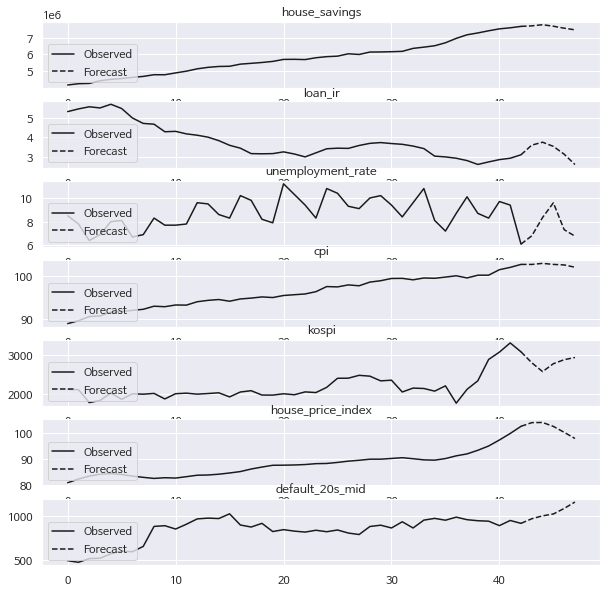

In [78]:
vecm_res.plot_forecast(steps=5, plot_conf_int=False)

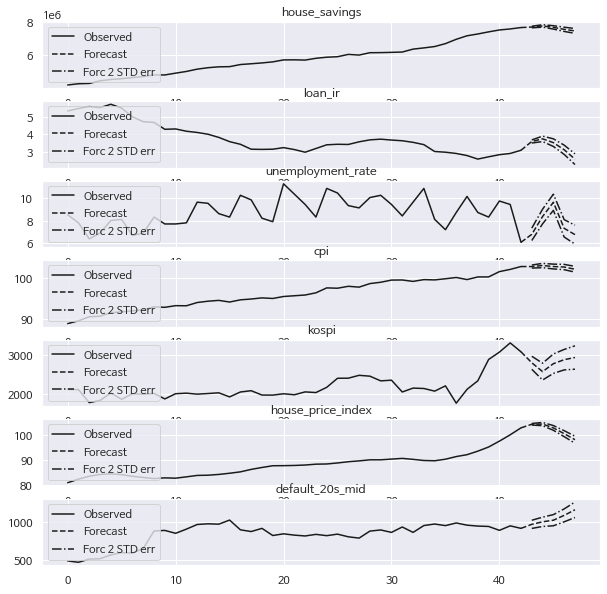

In [79]:
vecm_res.plot_forecast(steps=5, plot_conf_int=True)

## Structural analysis

### Granger causality

In [80]:
granger_results = vecm_res.test_granger_causality(caused="default_20s_mid", causing='cpi', signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
33.78,2.840,0.000,"(4, 21)"


### Instantaneous causality

In [81]:
inst_caus_base_rate = vecm_res.test_inst_causality(causing="cpi")
inst_caus_base_rate.summary()

Test statistic,Critical value,p-value,df
19.29,12.59,0.004,6


### Impulse response analysis

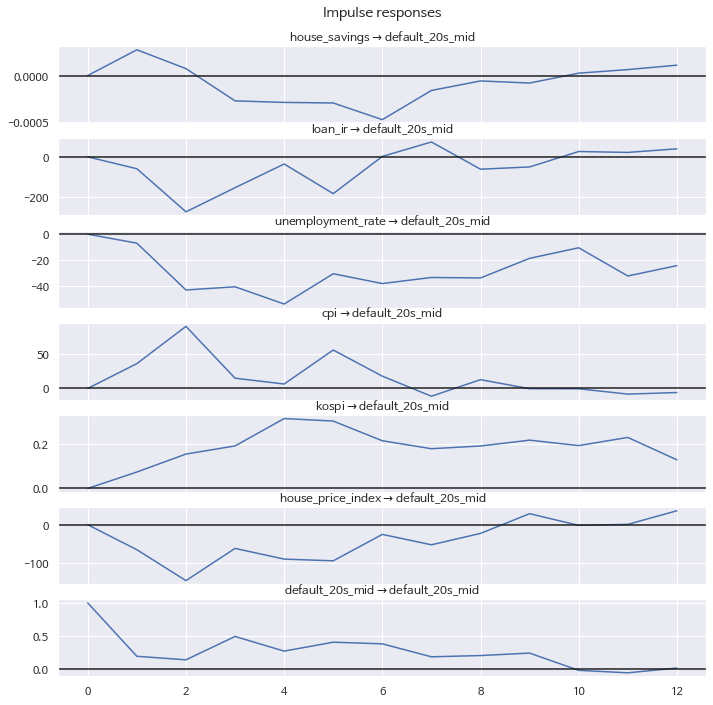

In [82]:
num_periods = 12
ir = vecm_res.irf(periods=num_periods)
#ir.plot(orth=False, plot_stderr=False, figsize=(15, 15))
ir.plot(orth=False, plot_stderr=False, response='default_20s_mid')
None

## Diagnostics

### Testing for nonormality

In [83]:
norm_test = vecm_res.test_normality()
norm_test.summary()

Test statistic,Critical value,p-value,df
9.538,23.68,0.795,14


### Checking for residual autocorrelation

In [84]:
white_test = vecm_res.test_whiteness(nlags=12, adjusted=True)
white_test.summary()

Test statistic,Critical value,p-value,df
761.5,439.2,0.000,392


# 20대 소득 상위 차주수 대비 신용관리대상등록자수 VECM


In [ ]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 5.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [85]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import *

## Data load

In [86]:
df = pd.read_csv('data/all_macro_data.csv', index_col=0)

In [87]:
df_ur = pd.read_csv('data/실업률.csv')

In [88]:
df['unemployment_rate'] = list(df_ur[(df_ur['성별']=='계') & (df_ur['연령계층별']=='20 - 29세')]['데이터'])

In [93]:
df_default = pd.read_csv('data/default.csv')
df_loan = pd.read_csv('data/2110059_20220113180614.csv')
df['default_20s_high_ratio'] = df_default[(df_default['연령대'] == '20대') & (df_default['소득추정등급'].isin([12, 13, 14, 15]))].groupby('기준분기').sum()['신용관리대상등록총금액<미적용, 등록자수, 명>'] / df_loan[(df_loan['연령대'] == '20대') & (df_loan['소득추정등급'].isin([12, 13, 14, 15]))].groupby('기준분기').sum()['차주수합계<미적용, 명>']

In [94]:
from sklearn.preprocessing import StandardScaler
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)

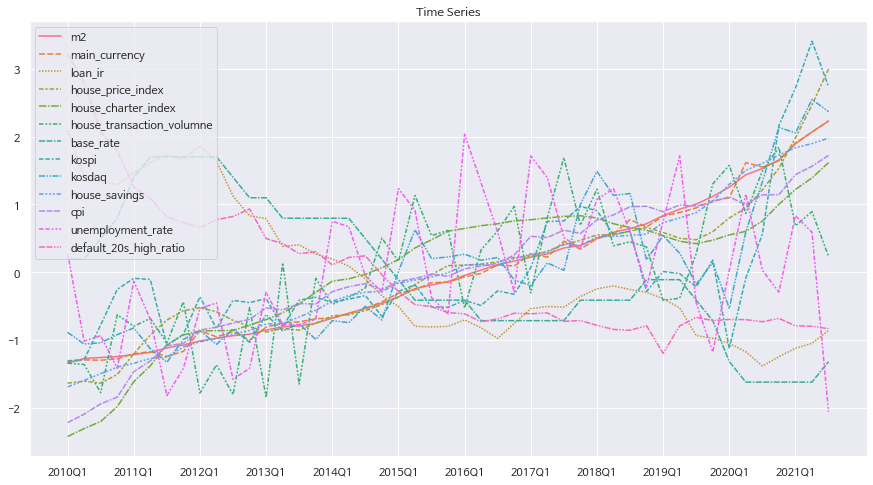

In [95]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_scaled)
ax.set_title('Time Series')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [96]:
df = df[['house_savings', 'loan_ir', 'unemployment_rate', 'cpi', 'kospi', 'house_price_index', 'default_20s_high_ratio']]

In [97]:
df

,house_savings,loan_ir,unemployment_rate,cpi,kospi,house_price_index,default_20s_high_ratio
2010Q1,3842540.0,5.91,9.0,85.523,1692.85,78.746871,0.112971
2010Q2,3940755.0,5.26,7.4,86.070,1698.29,78.902356,0.106155
2010Q3,4045679.0,5.20,7.5,86.733,1872.81,78.749925,0.094072
2010Q4,4144716.0,5.15,6.9,87.165,2051.00,79.410579,0.089590
2011Q1,4203173.0,5.32,8.5,88.806,2106.70,80.992792,0.080718
2011Q2,4277493.0,5.46,7.8,89.497,2100.69,82.421818,0.078000
2011Q3,4295968.0,5.57,6.4,90.476,1769.65,83.565929,0.073570
2011Q4,4454363.0,5.51,6.9,90.620,1825.74,84.283540,0.072148
2012Q1,4533489.0,5.70,8.0,91.481,2014.04,84.513625,0.070948
2012Q2,4581504.0,5.48,8.1,91.671,1854.01,84.204223,0.072871


In [98]:
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)

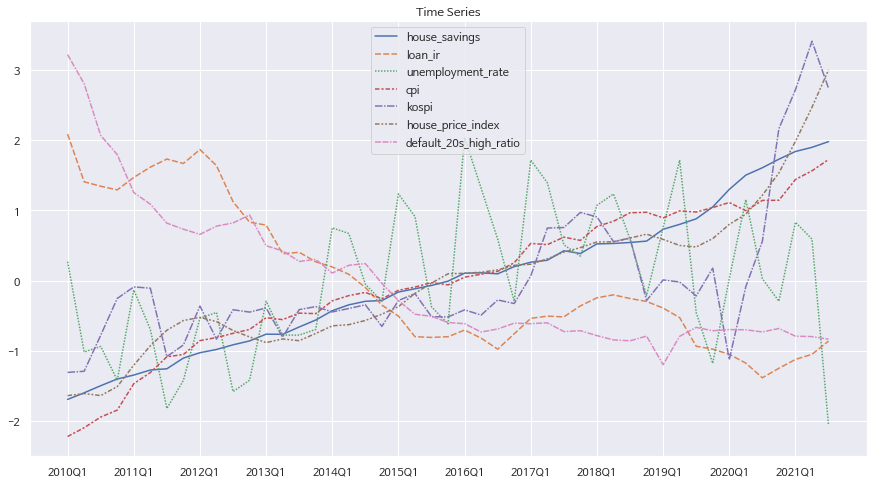

In [99]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_scaled)
ax.set_title('Time Series')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

## Granger's causality

In [100]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', maxlag=12, verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [101]:
grangers_causation_matrix(df, variables = df.columns)

,house_savings_x,loan_ir_x,unemployment_rate_x,cpi_x,kospi_x,house_price_index_x,default_20s_high_ratio_x
house_savings_y,1.0,0.0000,0.0000,0.0001,0.0000,0.0,0.0149
loan_ir_y,0.0,1.0000,0.0000,0.0000,0.0000,0.0,0.0000
unemployment_rate_y,0.0,0.0000,1.0000,0.0003,0.0000,0.0,0.0009
cpi_y,0.0,0.0001,0.0000,1.0000,0.0000,0.0,0.0250
kospi_y,0.0,0.0043,0.0783,0.0000,1.0000,0.0,0.0622
house_price_index_y,0.0,0.0000,0.0000,0.0001,0.0000,1.0,0.0004
default_20s_high_ratio_y,0.0,0.0000,0.0000,0.0000,0.0028,0.0,1.0000


## Unit root test

In [102]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [103]:
for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "house_savings" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.2441
 No. Lags Chosen       = 0
 Critical value 1%     = -3.581
 Critical value 5%     = -2.927
 Critical value 10%    = -2.602
 => P-Value = 0.9963. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "loan_ir" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.0996
 No. Lags Chosen       = 1
 Critical value 1%     = -3.585
 Critical value 5%     = -2.928
 Critical value 10%    = -2.602
 => P-Value = 0.7152. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "unemployment_rate" 
    -----------------------------------------------
 Null Hypo

In [104]:
for name, column in df.diff().dropna().iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "house_savings" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.7479
 No. Lags Chosen       = 0
 Critical value 1%     = -3.585
 Critical value 5%     = -2.928
 Critical value 10%    = -2.602
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "loan_ir" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.4076
 No. Lags Chosen       = 0
 Critical value 1%     = -3.585
 Critical value 5%     = -2.928
 Critical value 10%    = -2.602
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "unemployment_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Sign

## Cointegration rank

In [105]:
def cointegration_test(df, det_order=-1, k_ar_diff=5, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df, det_order=det_order,k_ar_diff=k_ar_diff)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [106]:
cointegration_test(df, 1, 3)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
house_savings ::  296.28    > 139.278   =>   True
loan_ir ::  194.12    > 107.3429  =>   True
unemployment_rate ::  126.85    > 79.3422   =>   True
cpi    ::  73.33     > 55.2459   =>   True
kospi  ::  41.06     > 35.0116   =>   True
house_price_index ::  14.06     > 18.3985   =>   False
default_20s_high_ratio ::  0.98      > 3.8415    =>   False


In [107]:
rank_test = select_coint_rank(df, 1, 3, method="trace",
                              signif=0.05)
rank_test.rank

5

In [108]:
rank_test.summary()

r_0,r_1,test statistic,critical value
0,7,296.3,139.3
1,7,194.1,107.3
2,7,126.9,79.34
3,7,73.33,55.25
4,7,41.06,35.01
5,7,14.06,18.40


## Lag order selection

In [109]:
lag_order = select_order(data=df, maxlags=10, deterministic="ci", seasons=4)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

,AIC,BIC,FPE,HQIC
0,9.487,13.18,1.588e+04,10.78
1,8.772,14.62,1.480e+04,10.81
2,5.921,13.93,5333.,8.715
3,-44.94,-34.78,2.766e-16,-41.39
4,-252.7,-240.4,-2.761e-108*,-248.4
5,-302.8*,-288.3*,-5.082e-134,-297.7*
6,-289.6,-273.0,-9.810e-131,-283.8
7,-291.9,-273.1,-1.162e-133,-285.3
8,-290.1,-269.2,-1.240e-134,-282.8
9,-291.5,-268.4,-8.217e-137,-283.4


In [114]:
lag_order = select_order(data=df, maxlags=3, deterministic='li', seasons=4)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,9.714,13.15*,1.840e+04,10.98
1,8.416,13.86,7140.,10.42
2,8.116,15.57,1.281e+04,10.87
3,4.297*,13.76,2322.*,7.786*


In [115]:
lag_order = select_order(data=df, maxlags=3, deterministic='li', seasons=0)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,11.09,13.67*,6.828e+04,12.04
1,9.130,13.72,1.199e+04,10.82
2,9.030,15.62,1.991e+04,11.46
3,6.042*,14.64,4243.*,9.214*


In [116]:
lag_order = select_order(data=df, maxlags=3, deterministic='lo', seasons=4)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,9.714,13.15*,1.840e+04,10.98
1,8.416,13.86,7140.,10.42
2,8.116,15.57,1.281e+04,10.87
3,4.297*,13.76,2322.*,7.786*


In [117]:
lag_order = select_order(data=df, maxlags=10, deterministic='lo', seasons=0)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

,AIC,BIC,FPE,HQIC
0,9.392,12.16,1.294e+04,10.36
1,8.912,13.84,1.183e+04,10.63
2,6.875,13.96,5006.,9.346
3,-34.24,-25.00,2.258e-13,-31.01
4,-232.2,-220.8,-9.015e-95*,-228.2
5,-295.8*,-282.3*,-1.252e-129,-291.1*
6,-293.6,-277.9,-1.589e-131,-288.2
7,-290.7,-272.8,-2.328e-132,-284.5
8,-291.8,-271.8,-1.188e-134,-284.8
9,-290.4,-268.2,-1.184e-135,-282.6


## Parameter estimation

In [118]:
model = VECM(df,
             k_ar_diff=3,
             coint_rank=5,
             deterministic='lo',
             seasons=4)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [119]:
vecm_res = model.fit()

In [120]:
vecm_res.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
season1,-6938.5209,3.16e+04,-0.219,0.826,-6.9e+04,5.51e+04
season2,5.322e+04,3.63e+04,1.465,0.143,-1.8e+04,1.24e+05
season3,4.428e+04,2.67e+04,1.657,0.097,-8081.028,9.66e+04
lin_trend,6.097e+04,1.1e+04,5.533,0.000,3.94e+04,8.26e+04
L1.house_savings,-0.0980,0.136,-0.723,0.470,-0.364,0.168
L1.loan_ir,7.011e+04,5.57e+04,1.260,0.208,-3.9e+04,1.79e+05
L1.unemployment_rate,7.664e+04,1.6e+04,4.788,0.000,4.53e+04,1.08e+05
L1.cpi,-6.824e+04,2.28e+04,-2.989,0.003,-1.13e+05,-2.35e+04
L1.kospi,244.1340,58.181,4.196,0.000,130.102,358.166
L1.house_price_index,6.637e+04,2.69e+04,2.471,0.013,1.37e+04,1.19e+05


## Forecasts

In [121]:
vecm_res.predict(steps=5)

array([[7.72202268e+06, 3.66296119e+00, 6.42010817e+00, 1.02741670e+02,
        2.72897290e+03, 1.04590775e+02, 4.33707766e-02],
       [7.75589452e+06, 4.09512053e+00, 8.93178598e+00, 1.03243902e+02,
        2.58475650e+03, 1.05638684e+02, 4.11278359e-02],
       [7.65794741e+06, 4.24128383e+00, 9.07659689e+00, 1.03355075e+02,
        2.69114634e+03, 1.05989105e+02, 4.17294450e-02],
       [7.59507791e+06, 4.33540050e+00, 6.80448017e+00, 1.03786521e+02,
        2.83026939e+03, 1.05873010e+02, 4.21997833e-02],
       [7.55853458e+06, 4.32781815e+00, 5.49830299e+00, 1.03946688e+02,
        2.78982729e+03, 1.05941936e+02, 4.51626083e-02]])

In [122]:
vecm_res.predict(steps=5, alpha=0.05)
for text, vaĺues in zip(("forecast", "lower", "upper"), vecm_res.predict(steps=5, alpha=0.05)):
    print(text+":", vaĺues, sep="\n")

forecast:
[[7.72202268e+06 3.66296119e+00 6.42010817e+00 1.02741670e+02
  2.72897290e+03 1.04590775e+02 4.33707766e-02]
 [7.75589452e+06 4.09512053e+00 8.93178598e+00 1.03243902e+02
  2.58475650e+03 1.05638684e+02 4.11278359e-02]
 [7.65794741e+06 4.24128383e+00 9.07659689e+00 1.03355075e+02
  2.69114634e+03 1.05989105e+02 4.17294450e-02]
 [7.59507791e+06 4.33540050e+00 6.80448017e+00 1.03786521e+02
  2.83026939e+03 1.05873010e+02 4.21997833e-02]
 [7.55853458e+06 4.32781815e+00 5.49830299e+00 1.03946688e+02
  2.78982729e+03 1.05941936e+02 4.51626083e-02]]
lower:
[[7.67895194e+06 3.56316521e+00 5.90566829e+00 1.02329454e+02
  2.55387589e+03 1.04382920e+02 4.11523360e-02]
 [7.69322984e+06 3.89330970e+00 8.28635248e+00 1.02617161e+02
  2.32852338e+03 1.05208874e+02 3.81985597e-02]
 [7.57657225e+06 3.93522477e+00 8.40203285e+00 1.02569765e+02
  2.37308981e+03 1.05429660e+02 3.85348871e-02]
 [7.49385195e+06 3.94527221e+00 6.06503839e+00 1.02833465e+02
  2.45969630e+03 1.05178870e+02 3.880699

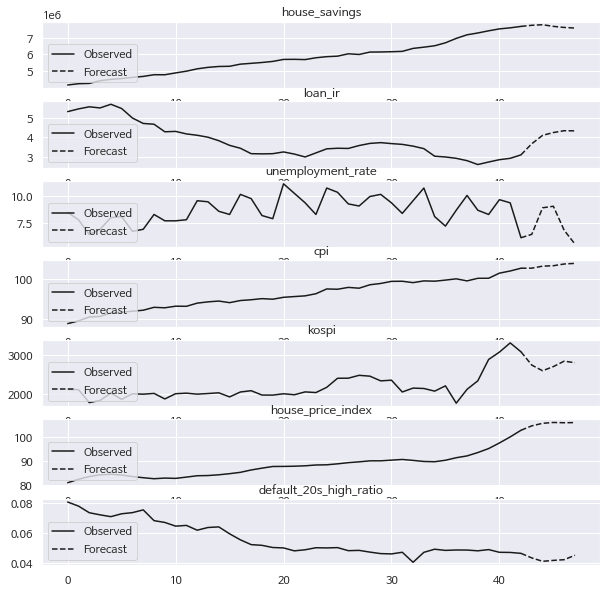

In [123]:
vecm_res.plot_forecast(steps=5, plot_conf_int=False)

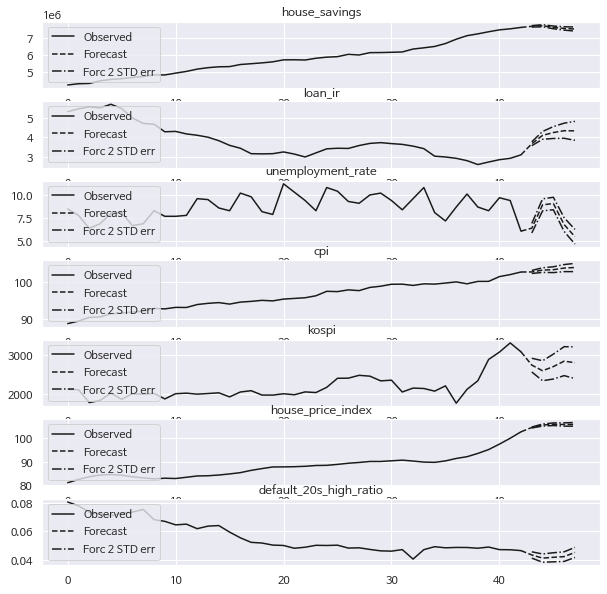

In [124]:
vecm_res.plot_forecast(steps=5, plot_conf_int=True)

## Structural analysis

### Granger causality

In [125]:
granger_results = vecm_res.test_granger_causality(caused="default_20s_high_ratio", causing='cpi', signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
13.79,2.840,0.000,"(4, 21)"


### Instantaneous causality

In [126]:
inst_caus_base_rate = vecm_res.test_inst_causality(causing="cpi")
inst_caus_base_rate.summary()

Test statistic,Critical value,p-value,df
18.96,12.59,0.004,6


### Impulse response analysis

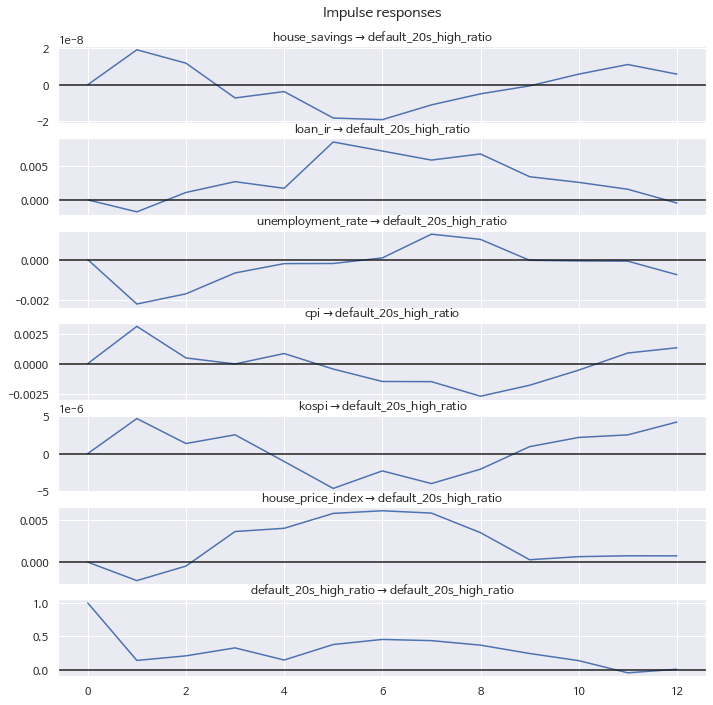

In [127]:
num_periods = 12
ir = vecm_res.irf(periods=num_periods)
#ir.plot(orth=False, plot_stderr=False, figsize=(15, 15))
ir.plot(orth=False, plot_stderr=False, response='default_20s_high_ratio')
None

## Diagnostics

### Testing for nonormality

In [128]:
norm_test = vecm_res.test_normality()
norm_test.summary()

Test statistic,Critical value,p-value,df
7.699,23.68,0.904,14


### Checking for residual autocorrelation

In [129]:
white_test = vecm_res.test_whiteness(nlags=12, adjusted=True)
white_test.summary()

Test statistic,Critical value,p-value,df
833.5,454.0,0.000,406


# 20대 소득 중위 차주수 대비 신용관리대상등록자수 VECM


In [ ]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 5.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import *

## Data load

In [136]:
df = pd.read_csv('data/all_macro_data.csv', index_col=0)

In [137]:
df_ur = pd.read_csv('data/실업률.csv')

In [138]:
df['unemployment_rate'] = list(df_ur[(df_ur['성별']=='계') & (df_ur['연령계층별']=='20 - 29세')]['데이터'])

In [139]:
df_default = pd.read_csv('data/default.csv')
df_loan = pd.read_csv('data/2110059_20220113180614.csv')
df['default_20s_mid_ratio'] = df_default[(df_default['연령대'] == '20대') & (df_default['소득추정등급'].isin([8, 9, 10, 11]))].groupby('기준분기').sum()['신용관리대상등록총금액<미적용, 등록자수, 명>'] / df_loan[(df_loan['연령대'] == '20대') & (df_loan['소득추정등급'].isin([8, 9, 10, 11]))].groupby('기준분기').sum()['차주수합계<미적용, 명>']

In [140]:
from sklearn.preprocessing import StandardScaler
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)

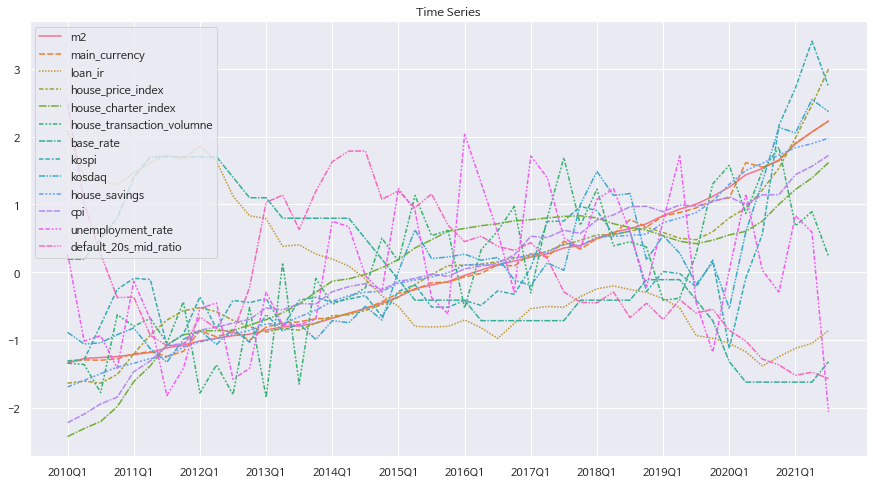

In [141]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_scaled)
ax.set_title('Time Series')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [142]:
df = df[['house_savings', 'loan_ir', 'unemployment_rate', 'cpi', 'kospi', 'house_price_index', 'default_20s_mid_ratio']]

In [143]:
df

,house_savings,loan_ir,unemployment_rate,cpi,kospi,house_price_index,default_20s_mid_ratio
2010Q1,3842540.0,5.91,9.0,85.523,1692.85,78.746871,0.075873
2010Q2,3940755.0,5.26,7.4,86.070,1698.29,78.902356,0.063467
2010Q3,4045679.0,5.20,7.5,86.733,1872.81,78.749925,0.057151
2010Q4,4144716.0,5.15,6.9,87.165,2051.00,79.410579,0.051733
2011Q1,4203173.0,5.32,8.5,88.806,2106.70,80.992792,0.051789
2011Q2,4277493.0,5.46,7.8,89.497,2100.69,82.421818,0.047010
2011Q3,4295968.0,5.57,6.4,90.476,1769.65,83.565929,0.045757
2011Q4,4454363.0,5.51,6.9,90.620,1825.74,84.283540,0.045642
2012Q1,4533489.0,5.70,8.0,91.481,2014.04,84.513625,0.049301
2012Q2,4581504.0,5.48,8.1,91.671,1854.01,84.204223,0.047880


In [144]:
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)

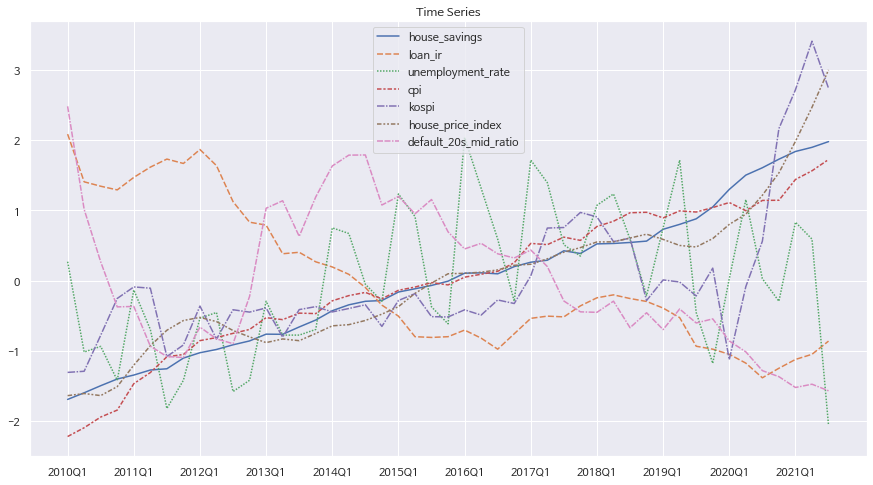

In [145]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_scaled)
ax.set_title('Time Series')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

## Granger's causality

In [ ]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', maxlag=12, verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [ ]:
grangers_causation_matrix(df, variables = df.columns)

,house_savings_x,loan_ir_x,unemployment_rate_x,cpi_x,kospi_x,house_price_index_x,default_20s_high_ratio_x
house_savings_y,1.0,0.0000,0.0000,0.0001,0.0000,0.0,0.0149
loan_ir_y,0.0,1.0000,0.0000,0.0000,0.0000,0.0,0.0000
unemployment_rate_y,0.0,0.0000,1.0000,0.0003,0.0000,0.0,0.0009
cpi_y,0.0,0.0001,0.0000,1.0000,0.0000,0.0,0.0250
kospi_y,0.0,0.0043,0.0783,0.0000,1.0000,0.0,0.0622
house_price_index_y,0.0,0.0000,0.0000,0.0001,0.0000,1.0,0.0004
default_20s_high_ratio_y,0.0,0.0000,0.0000,0.0000,0.0028,0.0,1.0000


## Unit root test

In [ ]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [ ]:
for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "house_savings" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.2441
 No. Lags Chosen       = 0
 Critical value 1%     = -3.581
 Critical value 5%     = -2.927
 Critical value 10%    = -2.602
 => P-Value = 0.9963. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "loan_ir" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.0996
 No. Lags Chosen       = 1
 Critical value 1%     = -3.585
 Critical value 5%     = -2.928
 Critical value 10%    = -2.602
 => P-Value = 0.7152. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "unemployment_rate" 
    -----------------------------------------------
 Null Hypo

In [ ]:
for name, column in df.diff().dropna().iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "house_savings" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.7479
 No. Lags Chosen       = 0
 Critical value 1%     = -3.585
 Critical value 5%     = -2.928
 Critical value 10%    = -2.602
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "loan_ir" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.4076
 No. Lags Chosen       = 0
 Critical value 1%     = -3.585
 Critical value 5%     = -2.928
 Critical value 10%    = -2.602
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "unemployment_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Sign

## Cointegration rank

In [ ]:
def cointegration_test(df, det_order=-1, k_ar_diff=5, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df, det_order=det_order,k_ar_diff=k_ar_diff)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [ ]:
cointegration_test(df, 1, 3)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
house_savings ::  296.28    > 139.278   =>   True
loan_ir ::  194.12    > 107.3429  =>   True
unemployment_rate ::  126.85    > 79.3422   =>   True
cpi    ::  73.33     > 55.2459   =>   True
kospi  ::  41.06     > 35.0116   =>   True
house_price_index ::  14.06     > 18.3985   =>   False
default_20s_high_ratio ::  0.98      > 3.8415    =>   False


In [ ]:
rank_test = select_coint_rank(df, 1, 3, method="trace",
                              signif=0.05)
rank_test.rank

5

In [ ]:
rank_test.summary()

r_0,r_1,test statistic,critical value
0,7,296.3,139.3
1,7,194.1,107.3
2,7,126.9,79.34
3,7,73.33,55.25
4,7,41.06,35.01
5,7,14.06,18.40


## Lag order selection

In [ ]:
lag_order = select_order(data=df, maxlags=10, deterministic="ci", seasons=4)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

,AIC,BIC,FPE,HQIC
0,9.487,13.18,1.588e+04,10.78
1,8.772,14.62,1.480e+04,10.81
2,5.921,13.93,5333.,8.715
3,-44.94,-34.78,2.766e-16,-41.39
4,-252.7,-240.4,-2.761e-108*,-248.4
5,-302.8*,-288.3*,-5.082e-134,-297.7*
6,-289.6,-273.0,-9.810e-131,-283.8
7,-291.9,-273.1,-1.162e-133,-285.3
8,-290.1,-269.2,-1.240e-134,-282.8
9,-291.5,-268.4,-8.217e-137,-283.4


In [ ]:
lag_order = select_order(data=df, maxlags=3, deterministic='li', seasons=4)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,9.714,13.15*,1.840e+04,10.98
1,8.416,13.86,7140.,10.42
2,8.116,15.57,1.281e+04,10.87
3,4.297*,13.76,2322.*,7.786*


In [ ]:
lag_order = select_order(data=df, maxlags=3, deterministic='li', seasons=0)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,11.09,13.67*,6.828e+04,12.04
1,9.130,13.72,1.199e+04,10.82
2,9.030,15.62,1.991e+04,11.46
3,6.042*,14.64,4243.*,9.214*


In [ ]:
lag_order = select_order(data=df, maxlags=3, deterministic='lo', seasons=4)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,9.714,13.15*,1.840e+04,10.98
1,8.416,13.86,7140.,10.42
2,8.116,15.57,1.281e+04,10.87
3,4.297*,13.76,2322.*,7.786*


In [ ]:
lag_order = select_order(data=df, maxlags=10, deterministic='lo', seasons=0)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

,AIC,BIC,FPE,HQIC
0,9.392,12.16,1.294e+04,10.36
1,8.912,13.84,1.183e+04,10.63
2,6.875,13.96,5006.,9.346
3,-34.24,-25.00,2.258e-13,-31.01
4,-232.2,-220.8,-9.015e-95*,-228.2
5,-295.8*,-282.3*,-1.252e-129,-291.1*
6,-293.6,-277.9,-1.589e-131,-288.2
7,-290.7,-272.8,-2.328e-132,-284.5
8,-291.8,-271.8,-1.188e-134,-284.8
9,-290.4,-268.2,-1.184e-135,-282.6


## Parameter estimation

In [ ]:
model = VECM(df,
             k_ar_diff=3,
             coint_rank=5,
             deterministic='lo',
             seasons=4)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [ ]:
vecm_res = model.fit()

In [ ]:
vecm_res.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
season1,-6938.5209,3.16e+04,-0.219,0.826,-6.9e+04,5.51e+04
season2,5.322e+04,3.63e+04,1.465,0.143,-1.8e+04,1.24e+05
season3,4.428e+04,2.67e+04,1.657,0.097,-8081.028,9.66e+04
lin_trend,6.097e+04,1.1e+04,5.533,0.000,3.94e+04,8.26e+04
L1.house_savings,-0.0980,0.136,-0.723,0.470,-0.364,0.168
L1.loan_ir,7.011e+04,5.57e+04,1.260,0.208,-3.9e+04,1.79e+05
L1.unemployment_rate,7.664e+04,1.6e+04,4.788,0.000,4.53e+04,1.08e+05
L1.cpi,-6.824e+04,2.28e+04,-2.989,0.003,-1.13e+05,-2.35e+04
L1.kospi,244.1340,58.181,4.196,0.000,130.102,358.166
L1.house_price_index,6.637e+04,2.69e+04,2.471,0.013,1.37e+04,1.19e+05


## Forecasts

In [ ]:
vecm_res.predict(steps=5)

array([[7.72202268e+06, 3.66296119e+00, 6.42010817e+00, 1.02741670e+02,
        2.72897290e+03, 1.04590775e+02, 4.33707766e-02],
       [7.75589452e+06, 4.09512053e+00, 8.93178598e+00, 1.03243902e+02,
        2.58475650e+03, 1.05638684e+02, 4.11278359e-02],
       [7.65794741e+06, 4.24128383e+00, 9.07659689e+00, 1.03355075e+02,
        2.69114634e+03, 1.05989105e+02, 4.17294450e-02],
       [7.59507791e+06, 4.33540050e+00, 6.80448017e+00, 1.03786521e+02,
        2.83026939e+03, 1.05873010e+02, 4.21997833e-02],
       [7.55853458e+06, 4.32781815e+00, 5.49830299e+00, 1.03946688e+02,
        2.78982729e+03, 1.05941936e+02, 4.51626083e-02]])

In [ ]:
vecm_res.predict(steps=5, alpha=0.05)
for text, vaĺues in zip(("forecast", "lower", "upper"), vecm_res.predict(steps=5, alpha=0.05)):
    print(text+":", vaĺues, sep="\n")

forecast:
[[7.72202268e+06 3.66296119e+00 6.42010817e+00 1.02741670e+02
  2.72897290e+03 1.04590775e+02 4.33707766e-02]
 [7.75589452e+06 4.09512053e+00 8.93178598e+00 1.03243902e+02
  2.58475650e+03 1.05638684e+02 4.11278359e-02]
 [7.65794741e+06 4.24128383e+00 9.07659689e+00 1.03355075e+02
  2.69114634e+03 1.05989105e+02 4.17294450e-02]
 [7.59507791e+06 4.33540050e+00 6.80448017e+00 1.03786521e+02
  2.83026939e+03 1.05873010e+02 4.21997833e-02]
 [7.55853458e+06 4.32781815e+00 5.49830299e+00 1.03946688e+02
  2.78982729e+03 1.05941936e+02 4.51626083e-02]]
lower:
[[7.67895194e+06 3.56316521e+00 5.90566829e+00 1.02329454e+02
  2.55387589e+03 1.04382920e+02 4.11523360e-02]
 [7.69322984e+06 3.89330970e+00 8.28635248e+00 1.02617161e+02
  2.32852338e+03 1.05208874e+02 3.81985597e-02]
 [7.57657225e+06 3.93522477e+00 8.40203285e+00 1.02569765e+02
  2.37308981e+03 1.05429660e+02 3.85348871e-02]
 [7.49385195e+06 3.94527221e+00 6.06503839e+00 1.02833465e+02
  2.45969630e+03 1.05178870e+02 3.880699

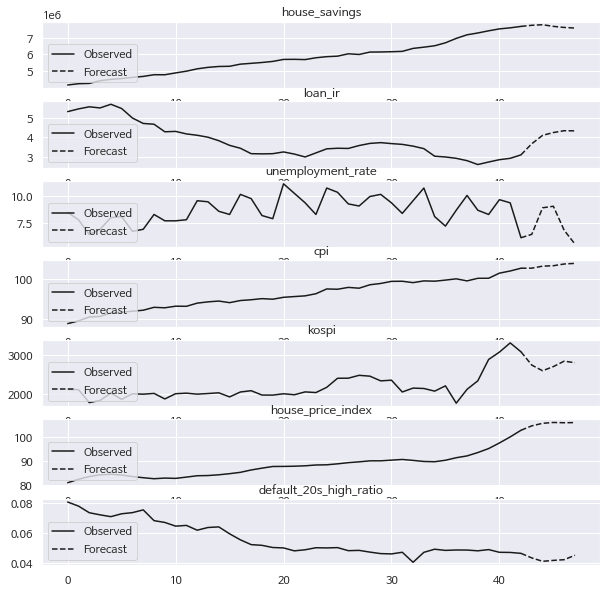

In [ ]:
vecm_res.plot_forecast(steps=5, plot_conf_int=False)

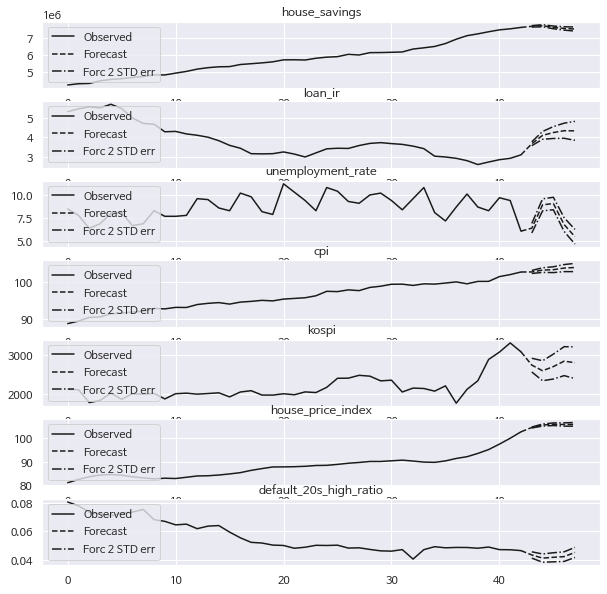

In [ ]:
vecm_res.plot_forecast(steps=5, plot_conf_int=True)

## Structural analysis

### Granger causality

In [ ]:
granger_results = vecm_res.test_granger_causality(caused="default_20s_high_ratio", causing='cpi', signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
13.79,2.840,0.000,"(4, 21)"


### Instantaneous causality

In [ ]:
inst_caus_base_rate = vecm_res.test_inst_causality(causing="cpi")
inst_caus_base_rate.summary()

Test statistic,Critical value,p-value,df
18.96,12.59,0.004,6


### Impulse response analysis

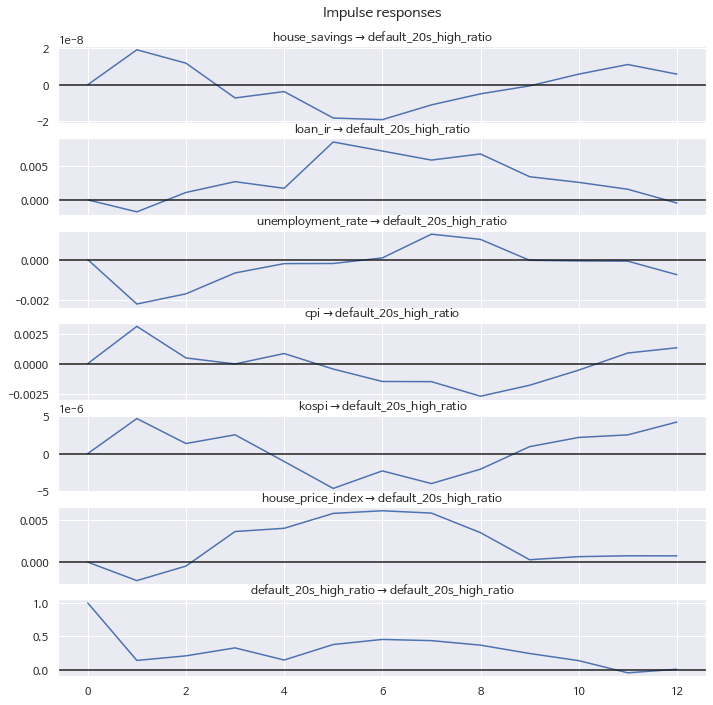

In [ ]:
num_periods = 12
ir = vecm_res.irf(periods=num_periods)
#ir.plot(orth=False, plot_stderr=False, figsize=(15, 15))
ir.plot(orth=False, plot_stderr=False, response='default_20s_high_ratio')
None

## Diagnostics

### Testing for nonormality

In [ ]:
norm_test = vecm_res.test_normality()
norm_test.summary()

Test statistic,Critical value,p-value,df
7.699,23.68,0.904,14


### Checking for residual autocorrelation

In [ ]:
white_test = vecm_res.test_whiteness(nlags=12, adjusted=True)
white_test.summary()

Test statistic,Critical value,p-value,df
833.5,454.0,0.000,406
